In [1]:
import numpy as np
import pandas as pd
import os
import collections
import pickle

In [2]:
df = pd.read_csv('../data/CSVFILES/annotations_enhanced.csv')
df['ix'] = range(df.shape[0])

In [3]:
patients = collections.OrderedDict()
dfsub_shape = []

for directory in [d for d in os.listdir('../data/') if 'subset' in d]:
    patients_by_dir = [f.replace('.mhd','') for f in os.listdir('../data/'+directory) if '.mhd' in f]
    patients[directory] = collections.OrderedDict()
    for patient in patients_by_dir:
        patients[directory][patient] = collections.OrderedDict()
        dfsub = df[df['seriesuid']==patient]
        dfsub_shape.append(dfsub.shape[0])
        count = max(6,6*dfsub.shape[0]*2)
        if count==6:
            patients[directory][patient]['random'] = count
        else:
            patients[directory][patient]['random'] = count/2
            patients[directory][patient]['true'] = count/2

In [4]:
with open('./voxel_to_patient_dict.pickle', 'wb') as handle:
    pickle.dump(patients, handle, protocol=pickle.HIGHEST_PROTOCOL)
print ('Dictionary SAVED')

Dictionary SAVED


### CHECK ORDERING!!!

In [5]:
patients_subset2 = [f.replace('.mhd','') for f in os.listdir('../data/subset2/') if '.mhd' in f]

In [6]:
print ('Patient',list(patients[list(patients.keys())[0]].keys())[0])
list(patients[list(patients.keys())[0]].keys())[0] == patients_subset2[0]

Patient 1.3.6.1.4.1.14519.5.2.1.6279.6001.156579001330474859527530187095


True

In [7]:
subset2true = np.load('../data/LUNA_voxels/subset2Xtrue.npy')
subset2random = np.load('../data/LUNA_voxels/subset2Xrandom.npy')

In [8]:
print (subset2true.shape)
print (subset2random.shape)

(768, 64, 64, 64)
(966, 64, 64, 64)


In [9]:
allvoxelscount = []
for patient in patients['subset2'].keys():
    allvoxelscount.extend(patients['subset2'][patient].values())
sum(allvoxelscount)

1734.0

In [10]:
subset2random.shape[0]+subset2true.shape[0]

1734

In [11]:
print ('Subsets in dictionary..')
list(patients.keys())

Subsets in dictionary..


['subset2',
 'subset9',
 'subset5',
 'subset3',
 'subset4',
 'subset6',
 'subset0',
 'subset8',
 'subset1',
 'subset7']

In [12]:
print ('Patients in subset..')
list(patients[list(patients.keys())[0]].keys())[0:3]

Patients in subset..


['1.3.6.1.4.1.14519.5.2.1.6279.6001.156579001330474859527530187095',
 '1.3.6.1.4.1.14519.5.2.1.6279.6001.133378195429627807109985347209',
 '1.3.6.1.4.1.14519.5.2.1.6279.6001.216526102138308489357443843021']

In [13]:
print ('Categories in patient..')
list(patients[list(patients.keys())[0]][list(patients[list(patients.keys())[0]].keys())[1]].keys())

Categories in patient..


['random', 'true']

888 144.0 6


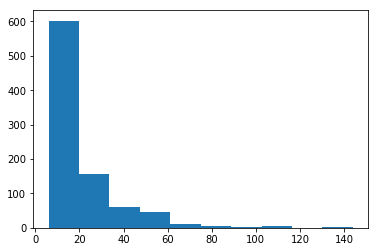

In [18]:
num_voxels = []
for subset in patients:
    for patient in patients[subset]:
        num_voxels.append(sum(patients[subset][patient].values()))
print (len(num_voxels),max(num_voxels),min(num_voxels))
import matplotlib.pyplot as plt
plt.hist(num_voxels)
plt.show()